E-Commerce Sales Analysis
Objective:
Analyze sales data from an e-commerce platform to identify trends, best-selling products, peak sales periods, and customer behavior patterns using Python.

Sample Dataset Schema:

Order_ID (unique identifier for each order)
Product_Name (e.g., "Laptop", "Smartphone")
Category (e.g., "Electronics", "Fashion")
Quantity (integer)
Price (float)
Order_Date (date)
Customer_Age (integer)
Region (e.g., "North", "South")

In [35]:
# lets start our mini project for sales data analytics

import numpy as np
from datetime import datetime,timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# sample data
products = ["Laptop", "Smartphone", "Headphones", "Shoes", "T-Shirt", "Watch","Pants"]
categories = ["Electronics", "Fashion", "Accessories"]
regions = ["North", "South", "East", "West"]

#Generate Random Data
data = []
for i in range(1000):
    Order_ID = f"O{i+1:04d}"
    Product_Name = np.random.choice(products)
    Category = np.random.choice(categories)
    Quantity = np.random.randint(1,5)
    price = round(np.random.uniform(10,100),2)
    Order_Date = datetime.now() - timedelta(days = np.random.randint(1,365))
    Customer_Age = np.random.randint(18,60)
    region = np.random.choice(regions)
    data.append([Order_ID,Product_Name, Category, Quantity, price, Order_Date, Customer_Age, region])
    
df = pd.DataFrame(data, columns=["Order_ID", "Product_Name", "Category", "Quantity", "Price", "Order_Date", "Customer_Age", "Region"])
df.to_csv("ecommerce.csv",index = False)

# Lets clean dataset and fill NAn values with the following
print(f"Do we have any NaN values the answer is {df.isna().any().any()}") # our data does not contain any null values
print("------------------------------------")

#if any presents
df.fillna({"Category":"Unknown","region":"Unknown"}, inplace = True)

# lets check topselling product
topSelling_products = df.groupby("Product_Name")["Quantity"].sum().sort_values(ascending=False)
print(f"The top selling 5 products are {topSelling_products.head()}")
print("------------------------------------")

# revenue will be price * Quantity
# lets create the revenue column
df["revenue"] = df["Price"] * df["Quantity"]
# revenue by category
revenue_by_category = df.groupby("Category")["revenue"].sum()
print(f"The revenue of the total sales are {revenue_by_category}")
print("------------------------------------")

#sales trend over month
sales_trend = df.groupby(df["Order_Date"].dt.month)["revenue"].sum()
print(sales_trend)
    



Do we have any NaN values the answer is False
------------------------------------
The top selling 5 products are Product_Name
Pants         399
Shoes         389
Smartphone    385
T-Shirt       382
Headphones    361
Name: Quantity, dtype: int64
------------------------------------
The revenue of the total sales are Category
Accessories    46405.34
Electronics    46456.79
Fashion        43520.87
Name: revenue, dtype: float64
------------------------------------
Order_Date
1     13757.86
2     13049.19
3     14146.71
4      8718.76
5     12480.94
6      9578.86
7     12270.03
8     10205.36
9     10894.90
10    13105.43
11     8669.33
12     9505.63
Name: revenue, dtype: float64


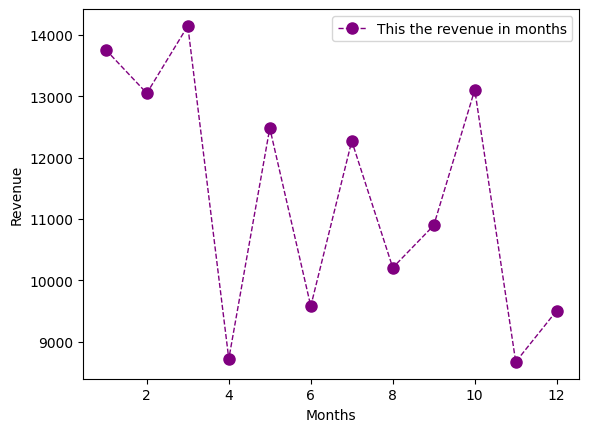

In [39]:
plt.figure()
plt.plot(sales_trend,marker = "o",color = "purple",linestyle = "--",linewidth = 1,markersize= 8,label = "This the revenue in months")
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.legend()
plt.show()

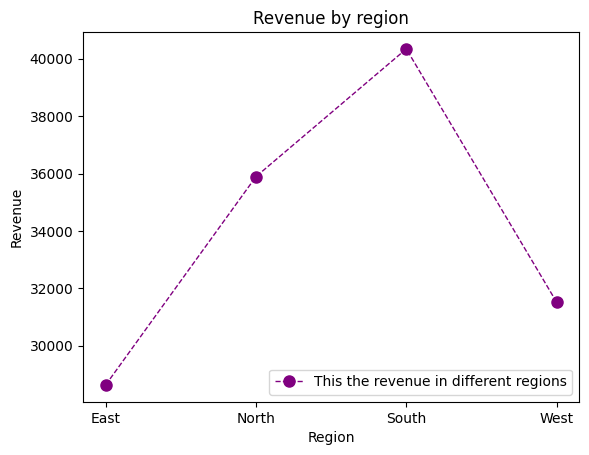

In [ ]:
#revenue by region

revenue_by_region = df.groupby("Region")["revenue"].sum()
revenue_by_region
plt.title("Revenue by region")
plt.plot(revenue_by_region,marker = "o",color = "purple",linestyle = "--",linewidth = 1,markersize= 8,label = "This the revenue in different regions")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.legend()
plt.show()

In [56]:
sales_trend = df.groupby(df["Order_Date"].dt.month)["revenue"].sum().sort_values(ascending=False)
revenue_by_region = df.groupby("Region")["revenue"].sum().sort_values(ascending=False)

print(f"The highest revenue is in {sales_trend.index[0]}rd month is {sales_trend.iloc[0]}$")
print(f"The highest revenue is in {revenue_by_region.index[0]} region is {revenue_by_region.iloc[0]}$")

The highest revenue is in 3rd month is 14146.71$
The highest revenue is in South region is 40341.43$
